# Computer Vision Lab 07: Visual SLAM

Some of the information in this lab comes from:
- https://www.cs.columbia.edu/~allen/F19/NOTES/slam_pka.pdf
- [Github repo for PySLAM](https://github.com/luigifreda/pyslam)

Today we will experiment with visual odometry / SLAM using the PySlam library.

PySLAM performs simultaneous localization and mapping (SLAM) using monocular cameras.

## SLAM

SLAM is a method for building a map while at the same time localizing a robot / person / vehicle within that map.
SLAM consists of two important features: mapping, and localization:
- Mapping: What does the world look like? A map should integrate the information gathered sequentially with one or more sensors into a given representation.
- Localization: Where am I? Localization means estimating robot / camera / person / vehicle pose relative to a given map (in SLAM, the map we are building
  as we explore the world). Typical problems:
    1. Pose tracking: beginning from a known initial pose
    2. Global localization: localizing without any a priori knowledge about the starting position. Sometimes also called the "captured robot problem."

## Visual SLAM

We can use many types of sensors for SLAM including ultrasonic sensors, laser scanners, and cameras. For cameras, we can use many different types of visual sensors, such as  monocular cameras, stereo rigs, RGB-D cameras, and so on.

### Why cameras?
- Vast information
- Cheap and easy to use
- Small size, weight, and power (SWaP) footprint
- Passive

### Applications of Visual SLAM
- Low-cost robotics (e.g. a mobile robot with a cheap camera)
- Agile robotics (e.g. drones)
- Smartphones
- AR/VR: inside-out tracking, gaming

<img src="img/CV07_01.PNG" title="Application" style="width: 600px;" />

[add reference]

### Feature-based visual odometry (VO)

Visual SLAM requires some kind of association of pixels between keyframes. One method is frame-by-frame tracking of points, followed by camera pose estimation, and
anohter is to use wide baseline matching techniques between keyframes without intermediate feature point tracking or optical flow. When we compute a sequence of camera
poses without creating a long-term map, the process is referred to as visual odometry (VO).

1. Feature detection: Detect a set of features $f_k$ at time $k$

<img src="img/CV07_02.PNG" title="Feature Detection" style="width: 300px;" />

[add reference]

2. Feature matching/tracking: Find correspondences between set of features $f_{k−1} , f_k$
    - tracking: locally search each feature
    - matching: independently detect features in each image and find correspondences on the basis of a similarity metric (exploit descriptors such SURF, SIFT, ORB, etc)
    
<img src="img/CV07_03.PNG" title="Feature matching" style="width: 600px;" />

[add reference]

3. Motion estimation - Compute transformation Tk between two images Ik−1 and Ik from two sets of corresponding features $f_{k−1} , f_k$. The different algorithms depending on available sensor data:
    - 2-D to 2-D: works on $f_{k−1} , f_k$ specified in 2-D image coords
    - 3-D to 3-D: works on $X_{k−1} , X_k$ sets of 3D points corresponding to $f_{k−1} , f_k$
    - 3-D to 2-D: works on $X_{k−1}$ set of 3D points corresponding to $f_{k−1}$, and on $f_k$ their corresponding 2-D reprojections on the image $I_k$
    
<img src="img/CV07_04.PNG" title="Feature matching" style="width: 400px;" />

[add reference]

4. Local optimization - An iterative refinement over last m poses can be optionally performed after motion estimation to obtain a more accurate estimate of the local trajectory

<img src="img/CV07_05.PNG" title="Local optimization" style="width: 600px;" />

We must minimize the reprojection error

$$T_k = 
\begin{bmatrix}
R_{k-1,k} & t_{k-1,k} \\ 
0 & 1
\end{bmatrix}=
\text{argmin}_{X^i,C_k} \sum_{i,k} ||p^i_k-g(X^i,C_k)||
$$

where $p^k_i$ is the $i$-th image point of the 3D landmark $X_i$ measured in the $k$-th image and
$g(X_i, C_k)$ is its image reprojection according to the current camera pose $C_k$

### VO vs Visual SLAM

- The goal of SLAM in general is to obtain a global and consistent estimate of the robot path and the map. This is done by combining VO with a method for identifying *loop closures*. When a loop closure is detected, this information is used to reduce the drift in both the map and camera path (global bundle adjustment)
- Conversely, VO aims at recovering a path incrementally, pose after pose, without trying to maintain a perfect global map. VO can potentially use optimization only over the last m pose path (windowed bundle adjustment)

<img src="img/CV07_06.PNG" title="close loop" style="width: 600px;" />

- VO only aims at the local consistency of the trajectory, while SLAM aims to the global consistency of the trajectory and of the map
- VO can be used as a building block for SLAM
- VO is SLAM without loop closure
- The choice between VO and Visual SLAM depends on the application requirements and the tradeoff between performance, consistency, and simplicity of implementation
- VO trades off consistency for real-time performance, due to dropping the past history of the camera's motion

## PySlam main scripts

- <code>main_vo.py</code> combines the simplest VO ingredients without performing any image point triangulation or windowed bundle adjustment. At each step $k$, <code>main_vo.py</code> estimates the current camera pose $C_k$ with respect to the previous one $C_{k-1}$. The inter-frame pose estimation returns $[R_{k-1,k},t_{k-1,k}]$ with $||t_{k-1,k}||=1$.

- <code>main_slam.py</code> adds feature tracking along multiple frames, point triangulation, keyframe management and bundle adjustment in order to estimate the camera trajectory up-to-scale and build a map. It's still a VO pipeline but it shows some basic blocks which are necessary to develop a real visual SLAM pipeline.

<img src="img/main-vo.png" title="vo" style="width: 600px;" />

## PySlam Installation

Clone this repo and its modules by running

In [ ]:
!git clone --recursive https://github.com/luigifreda/pyslam.git

### Setup for Ubuntu 20.04

For Ubuntu 20.04, [follow the instructions in the Github README](https://github.com/luigifreda/pyslam#install-pyslam-under-ubuntu-2004).

First, we check out the experimental branch ubuntu20:

In [ ]:
!git checkout ubuntu20  

#### Basic Installation

In order to run <code>main_vo.py</code> with venv, get in the root of the repository and run the following command:

In [ ]:
!. pyenv-create.sh 

This will create a custom pyslam environment and will also activate it. Now, from the same terminal, you can run:

In [ ]:
!python3 -O main_vo.py

#### Full Installation

In order to run <code>main_slam.py</code> with venv, get in the root of the repository and run the following command:

In [ ]:
!. install_all_venv.sh 

This will compile the required thirdparty packages and will also activate the created pyslam environment. Now, from the same terminal, you can run:

In [ ]:
!python3 -O main_slam.py

### Setup in MacOS

Check the instructions in this [file](https://github.com/luigifreda/pyslam/blob/master/MAC.md).

### Setup in Windows

Check the instructions in this [file](https://github.com/luigifreda/pyslam/issues/51).

## Datasets
You can use 4 different types of datasets:

|Dataset|type in config.ini|
|-----|-----|
|KITTI odometry data set (grayscale, 22 GB)|type=KITTI_DATASET|
|TUM dataset|type=TUM_DATASET|
|video file|type=VIDEO_DATASET|
|folder of images|type=FOLDER_DATASET|

### KITTI Datasets
pySLAM code expects the following structure in the specified KITTI path folder (specified in the section <code>[KITTI_DATASET]</code> of the file config.ini).

├── sequences

    ├── 00
    
    ...
    
    ├── 21
    
├── poses

    ├── 00.txt
    
        ...
        
    ├── 10.txt

1. Download the dataset (grayscale images) from http://www.cvlibs.net/datasets/kitti/eval_odometry.php and prepare the KITTI folder as specified above

2. Select the corresponding calibration settings file (parameter [KITTI_DATASET][cam_settings] in the file config.ini)

### TUM Datasets
pySLAM code expects a file associations.txt in each TUM dataset folder (specified in the section <code>[TUM_DATASET]</code> of the file config.ini).

Download a sequence from http://vision.in.tum.de/data/datasets/rgbd-dataset/download and uncompress it.

Associate RGB images and depth images using the python script associate.py. You can generate your associations.txt file by executing:

In [ ]:
!python associate.py PATH_TO_SEQUENCE/rgb.txt PATH_TO_SEQUENCE/depth.txt > associations.txt

Select the corresponding calibration settings file (parameter <code>[TUM_DATASET][cam_settings]</code> in the file config.ini)

### Camera Settings
The folder settings contains the camera settings files which can be used for testing the code. These are the same used in the framework ORBSLAM2. You can easily modify one of those files for creating your own new calibration file (for your new datasets).

In order to calibrate your camera, you can use the scripts in the folder calibration. In particular:

1. use the script grab_chessboard_images.py to collect a sequence of images where the chessboard can be detected (set the chessboard size therein, you can use the calibration pattern calib_pattern.pdf in the same folder)
2. use the script calibrate.py to process the collected images and compute the calibration parameters (set the chessboard size therein)

If you want to use your camera, you have to:

- calibrate it and configure WEBCAM.yaml accordingly
- record a video (for instance, by using save_video.py in the folder calibration)
- configure the <code>[VIDEO_DATASET]</code> section of config.ini in order to point to your video.

## Lab Homework

Collect your own video with a phone / laptop / ground robot / dashboard camera and set up PySLAM for VO and SLAM with your video. Report the results and level of accuracy.

KITTI 06 - Video

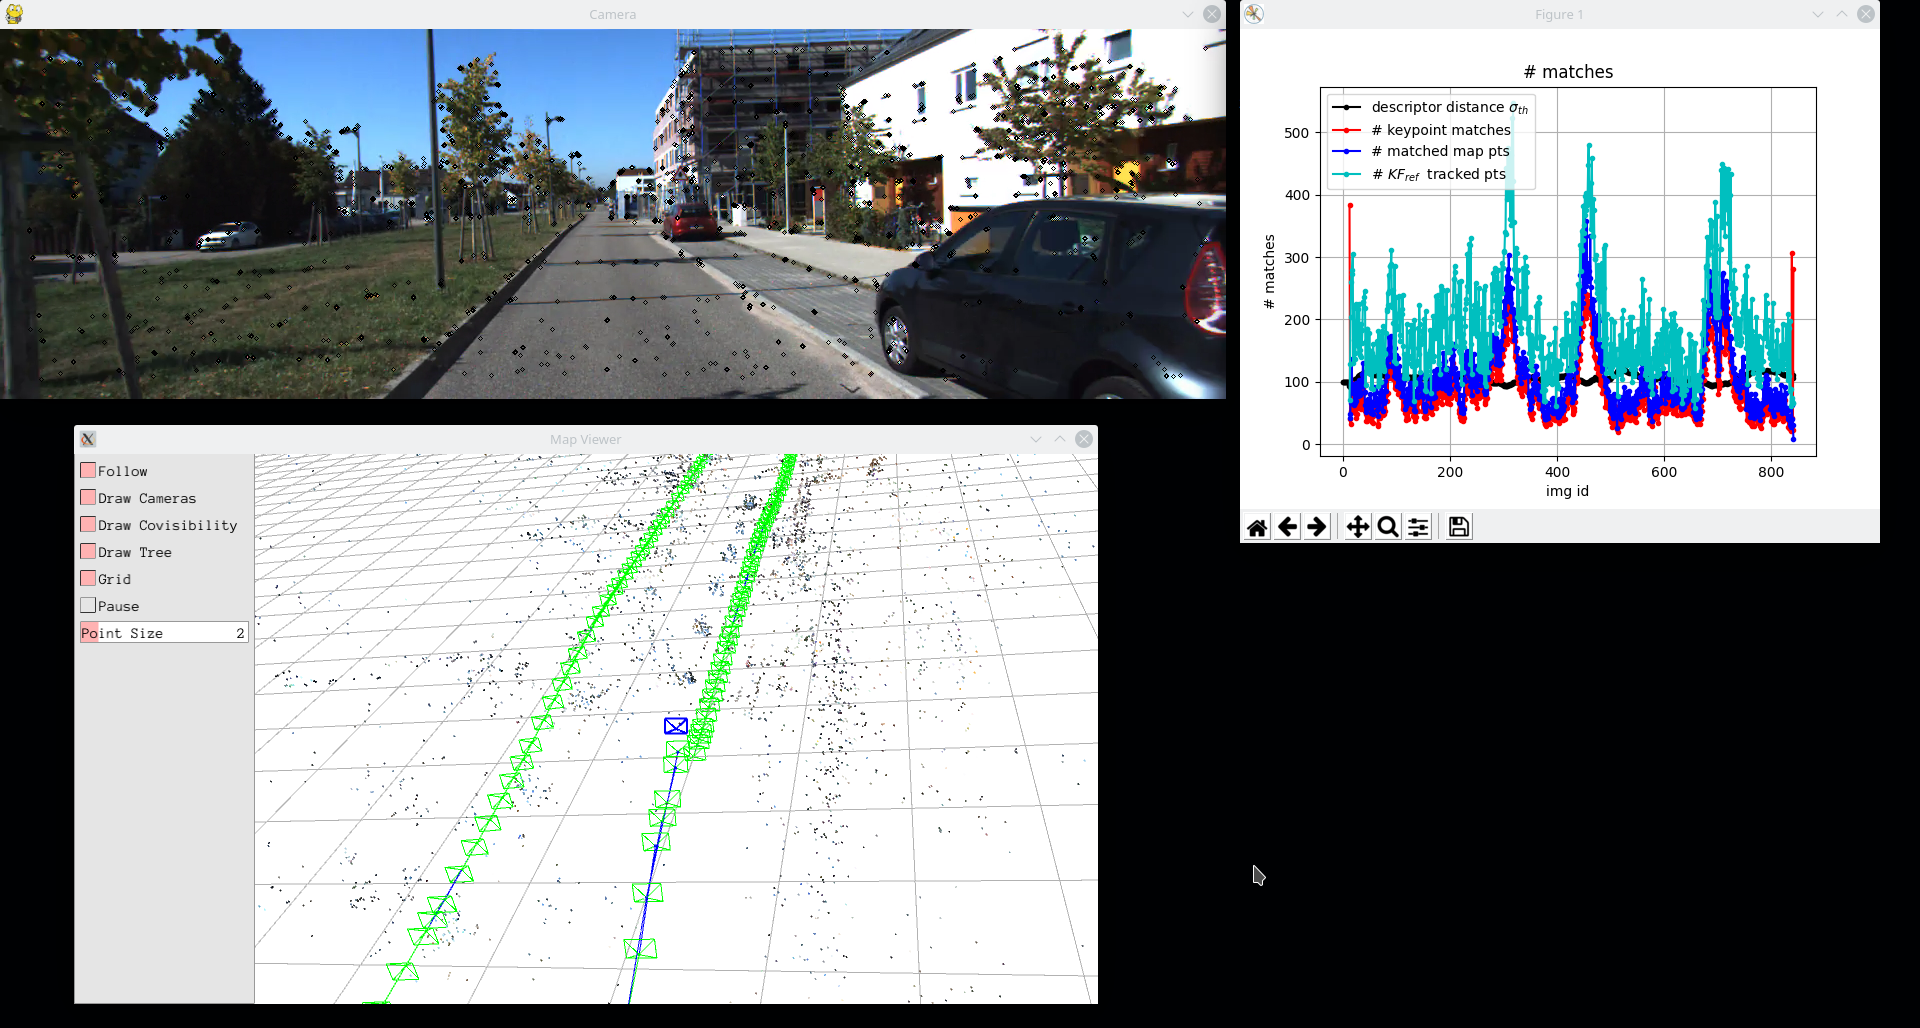

### KITTI 00 - Images

#### VO
The error seems to be pretty small and the trajectory is close to groundtruth.

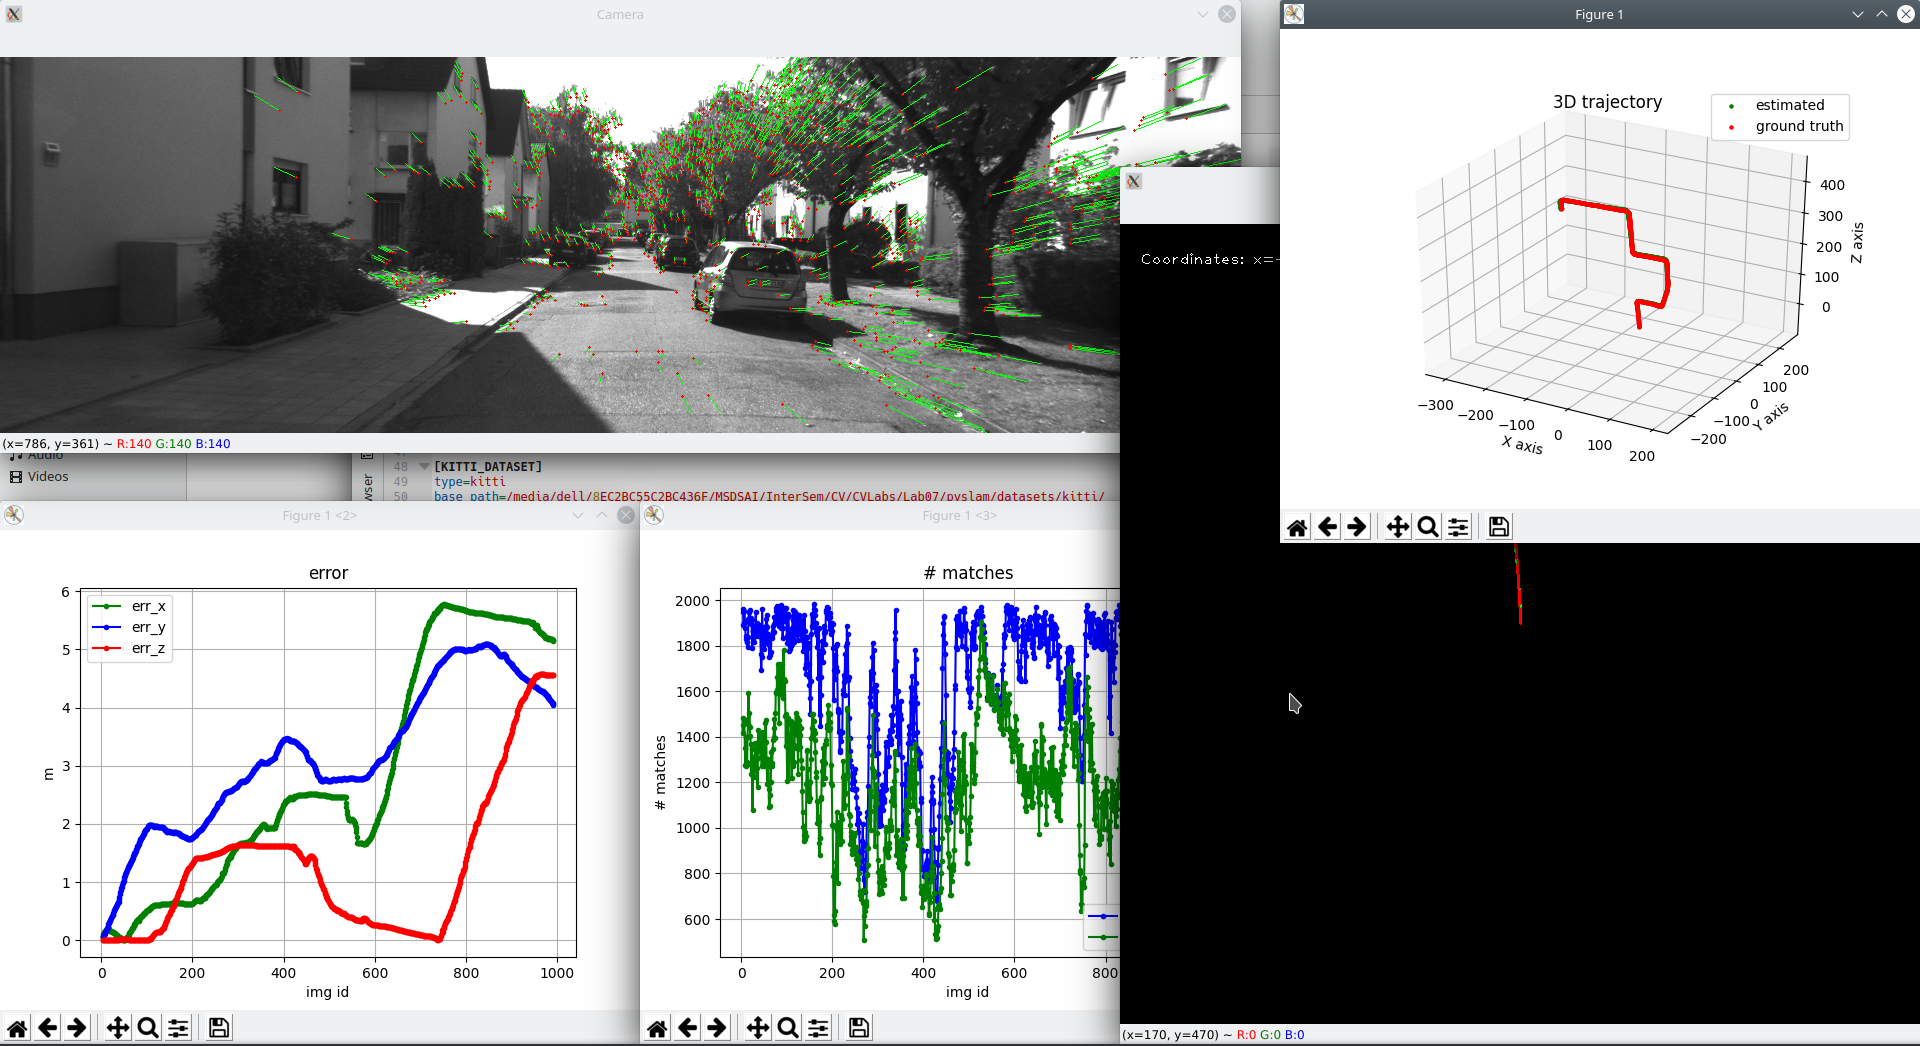

#### SLAM

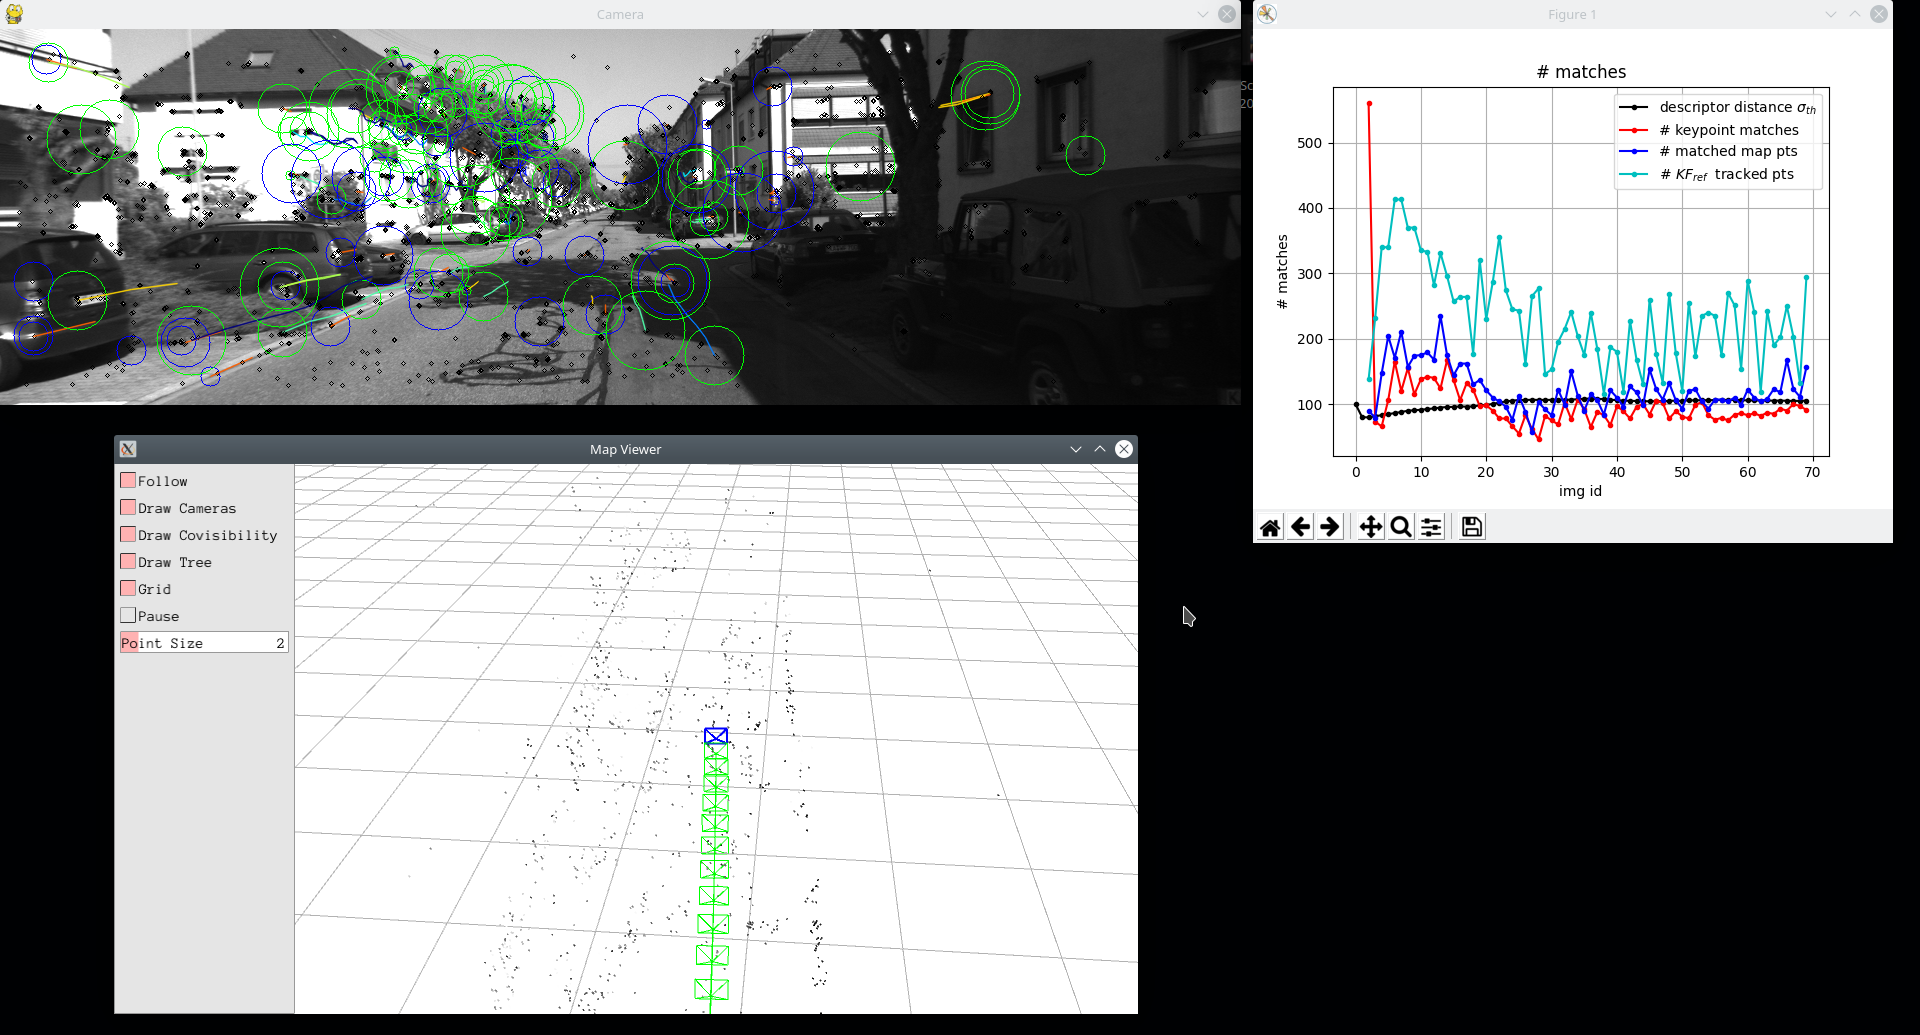

### TUM RGBD dataset

#### VO
There is a large error in the x and z dimensions

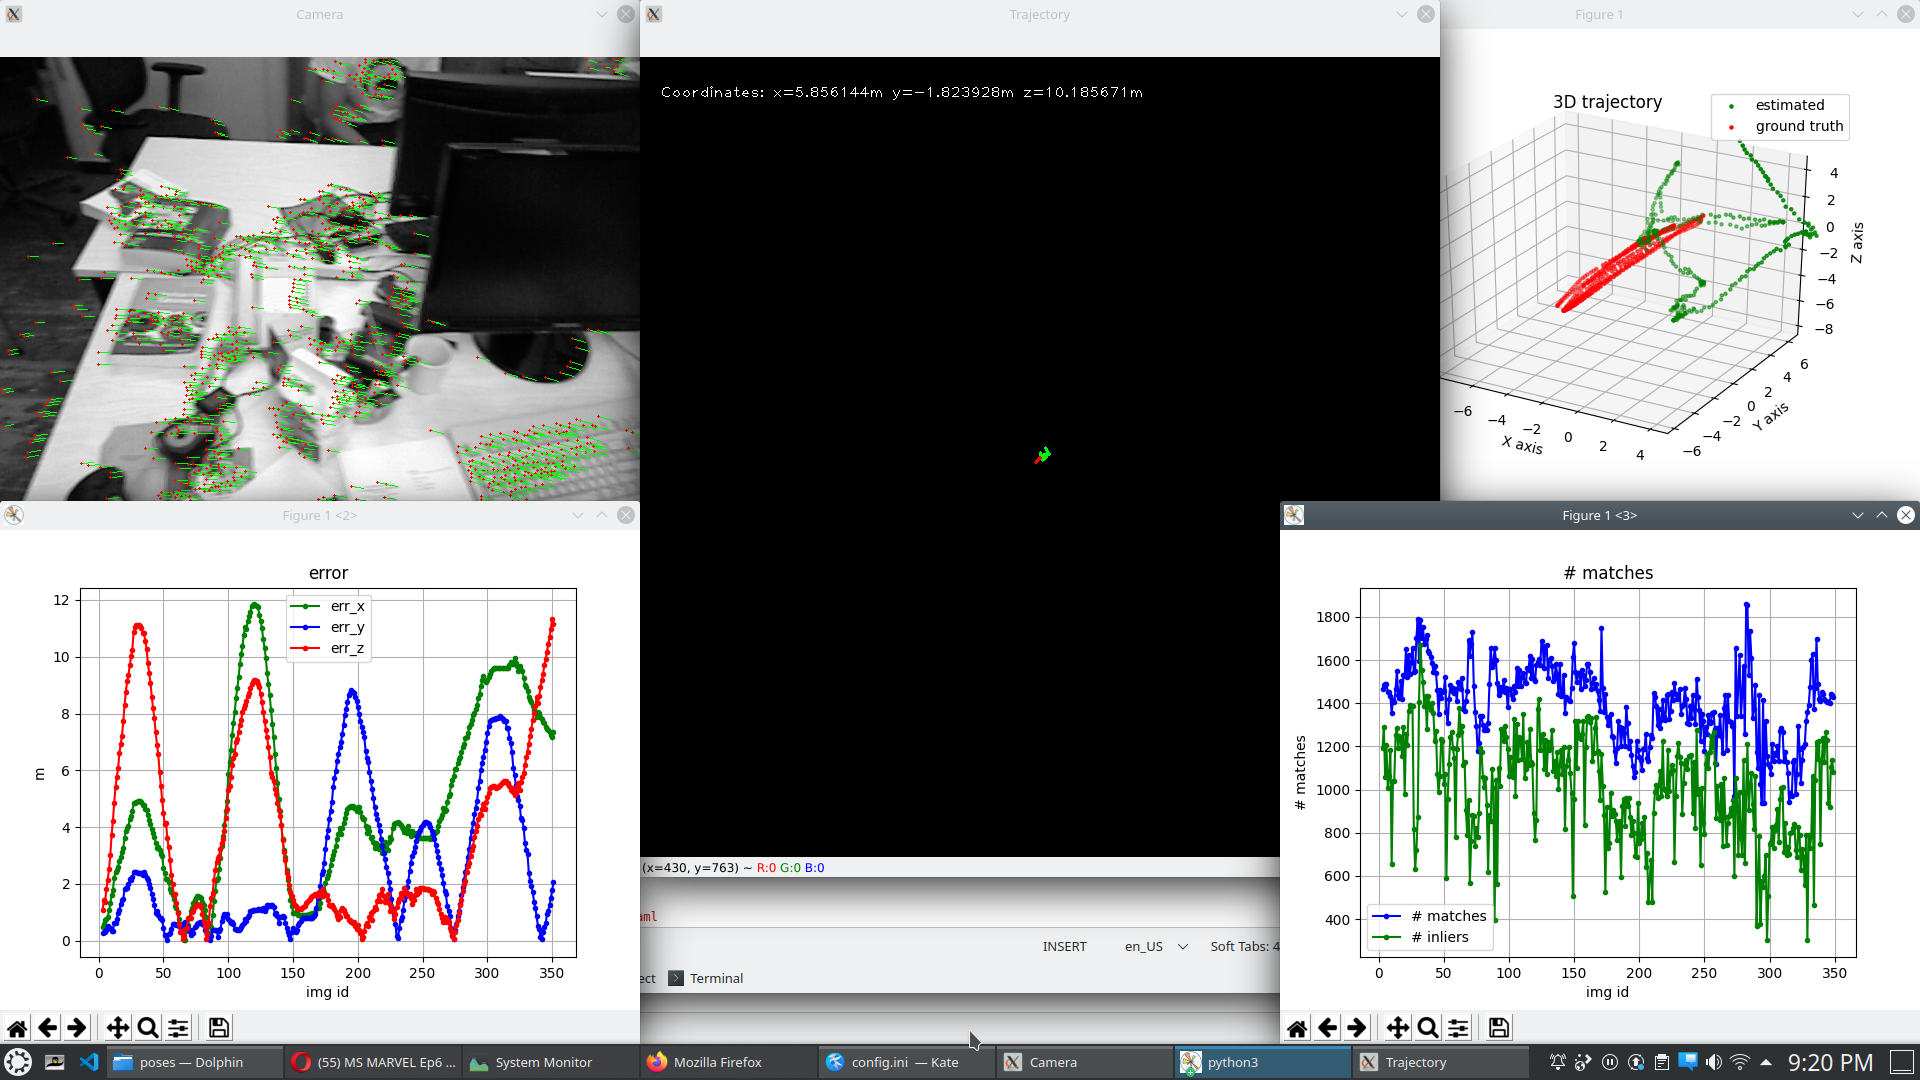

#### SLAM

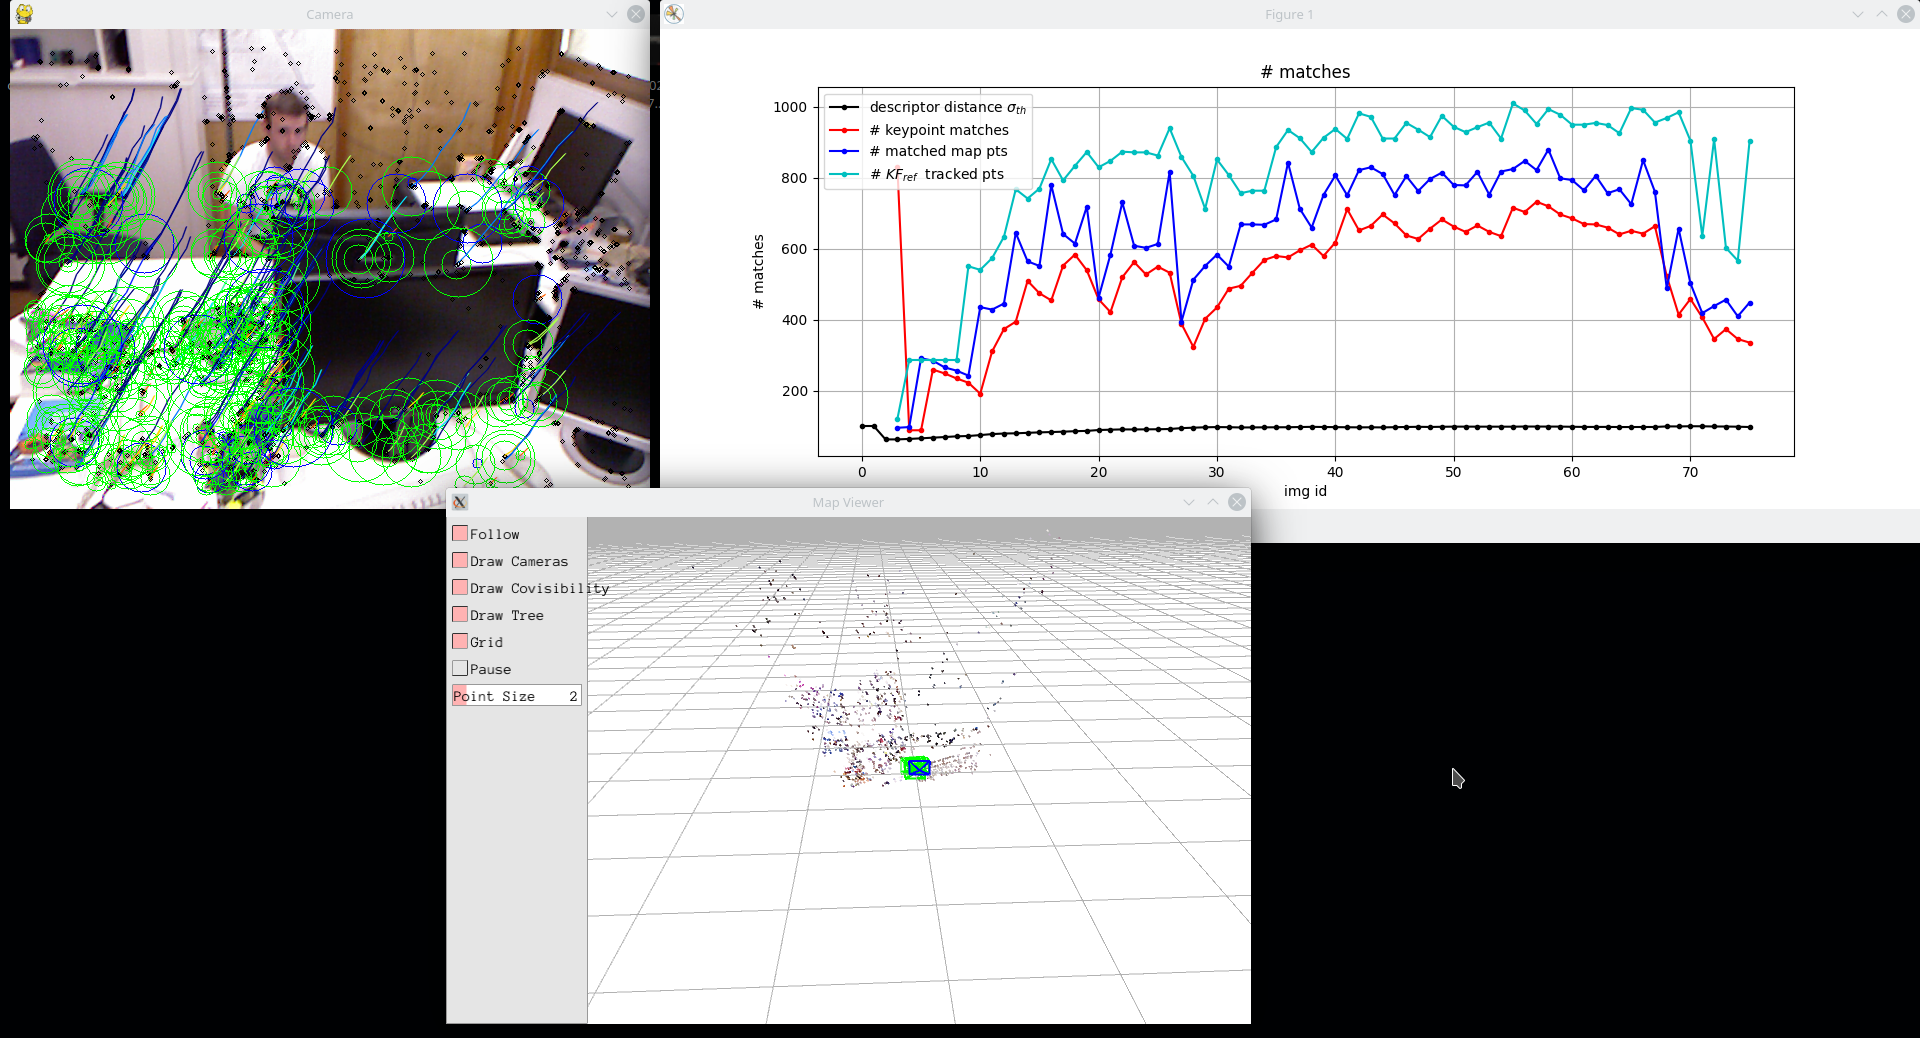

### My Video

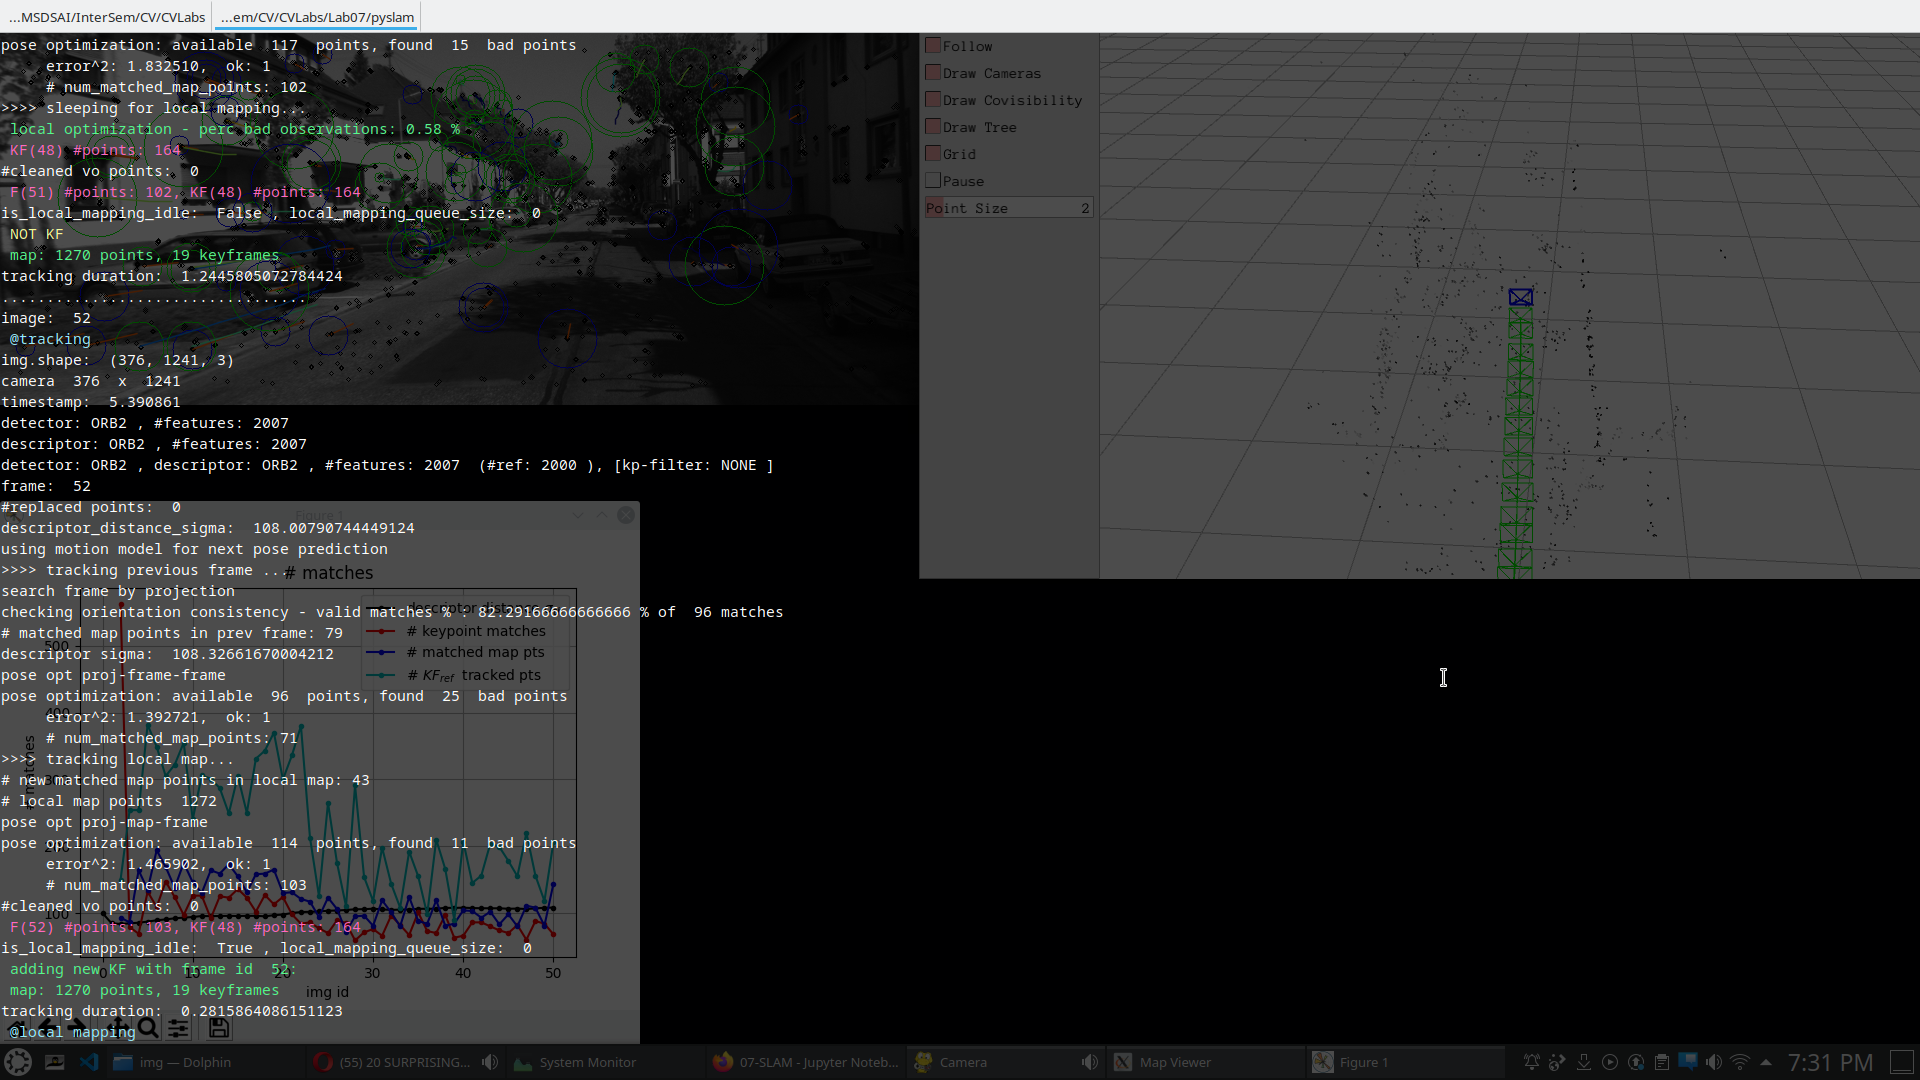

Tracking failure in the SLAM for a few images due to low number of matched points

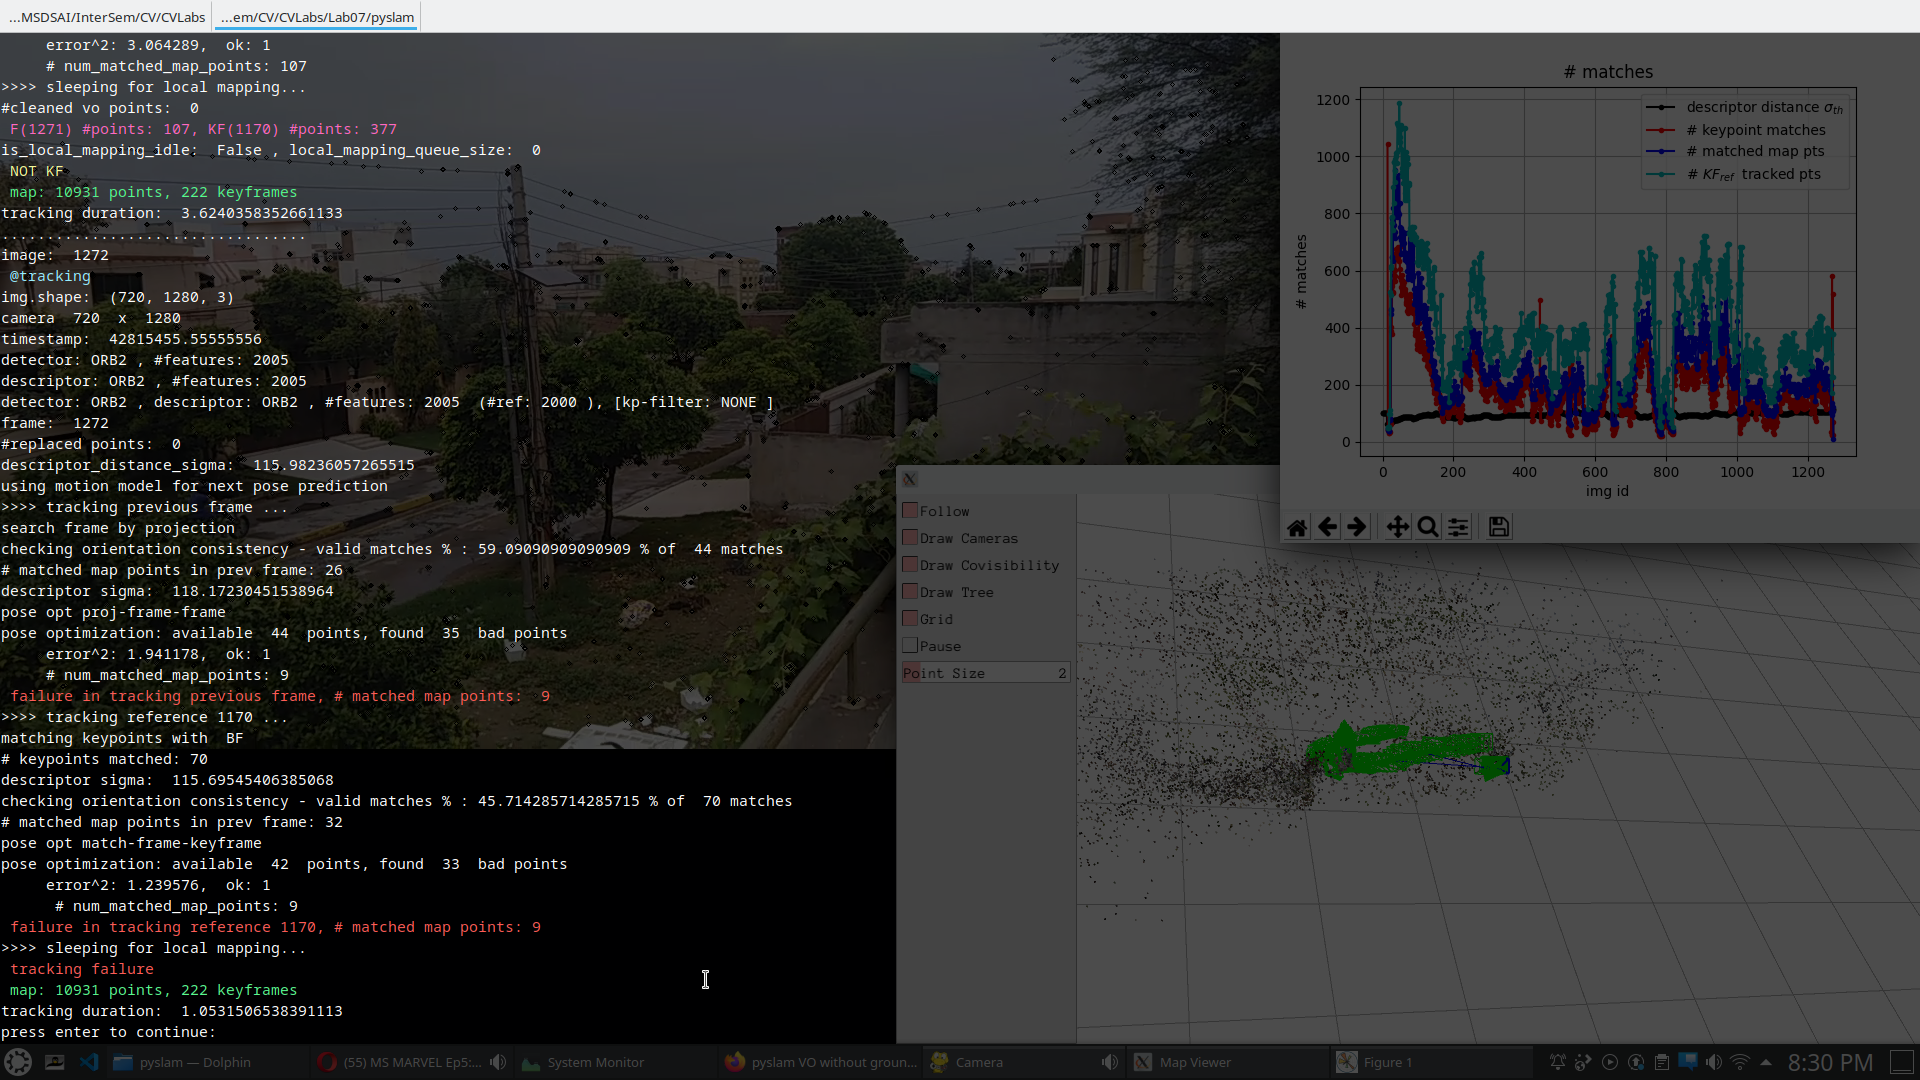

Final trajectory

The Trajectory seems to be pretty accurate as per the camera motion during taking video.

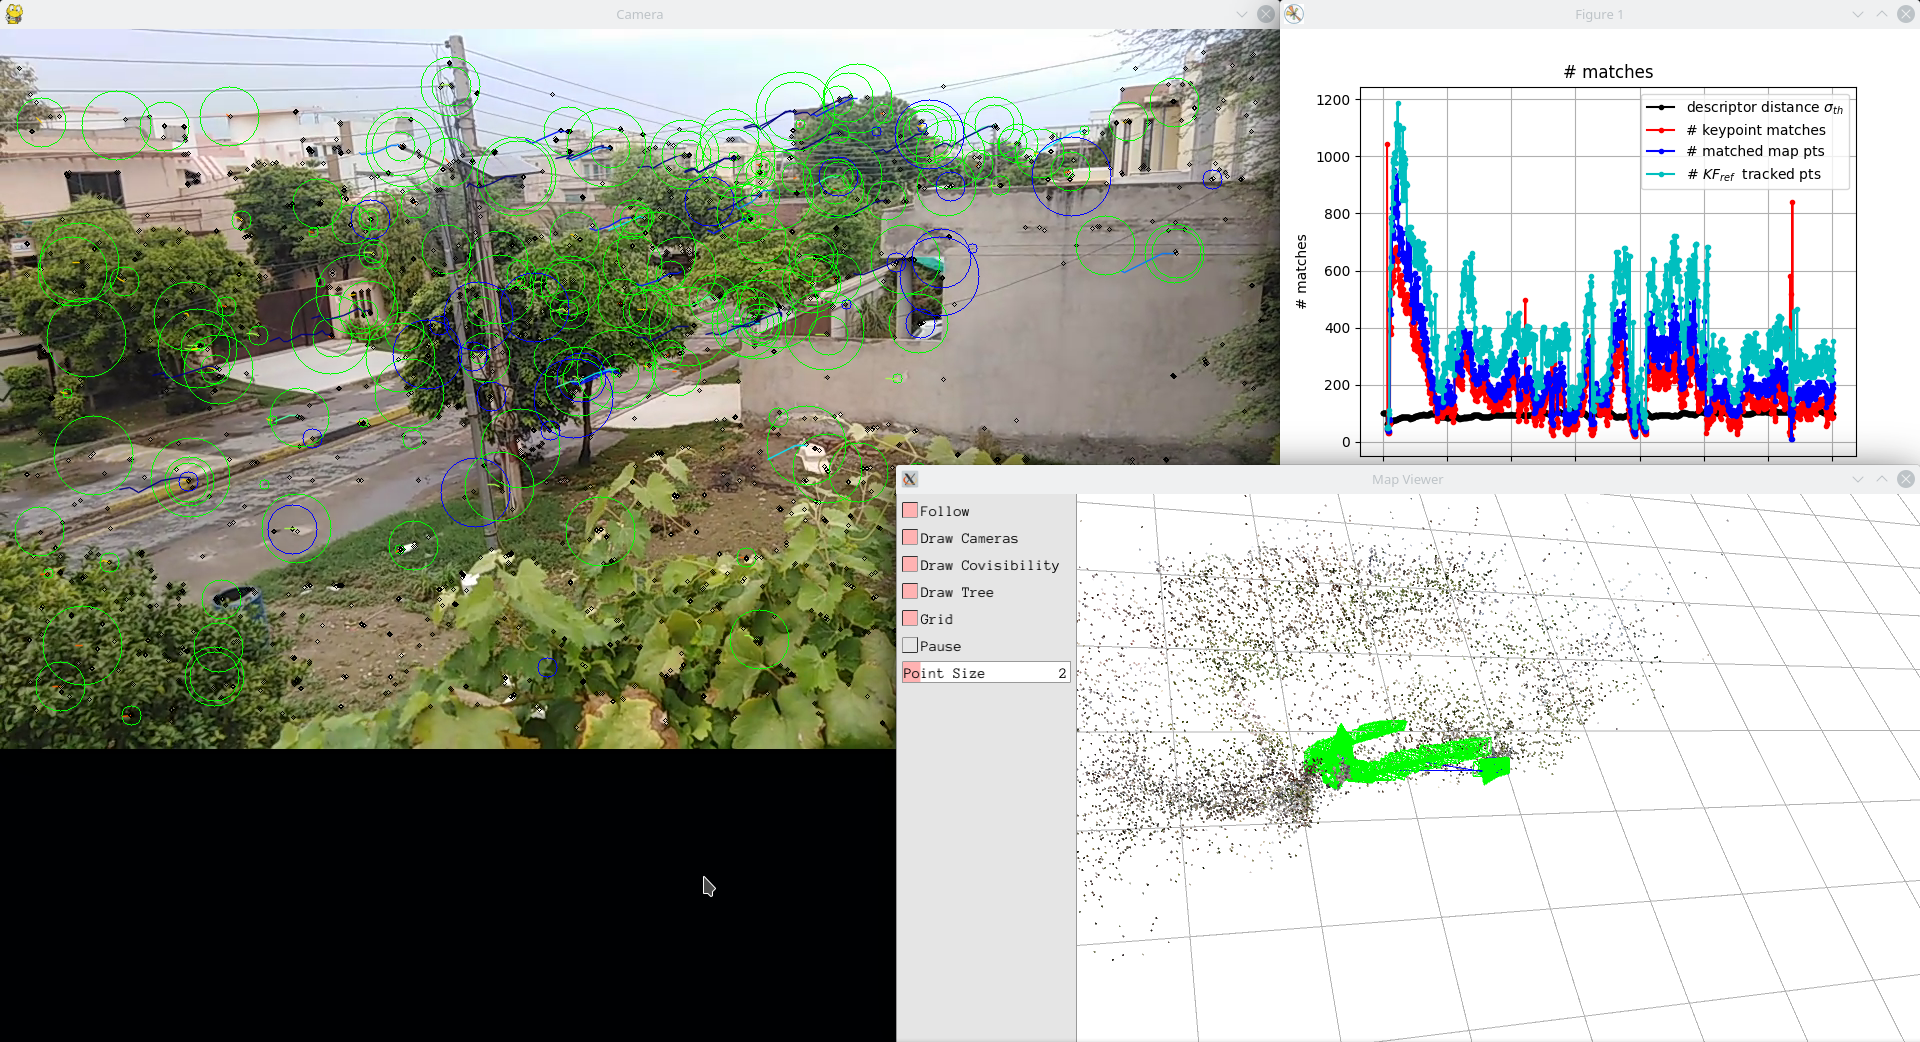